# Overfitting vs Underfitting: A Visual Guide

## Understanding Model Complexity

This notebook demonstrates the critical concepts of **overfitting** and **underfitting** using a simple yet illustrative example: predicting a noisy sine wave.

### Key Concepts:

- **Underfitting**: When a model is too simple to capture the underlying patterns in the data
  - High training error
  - High test error
  - Poor performance everywhere

- **Overfitting**: When a model learns the training data too well, including noise
  - Low training error
  - High test error
  - Memorizes instead of generalizes

- **Good Fit**: When a model captures the true pattern without memorizing noise
  - Moderate training error
  - Similar test error
  - Generalizes well to new data

## Setup and Data Generation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# set random seeds for reproducibility
np.random.seed(42)

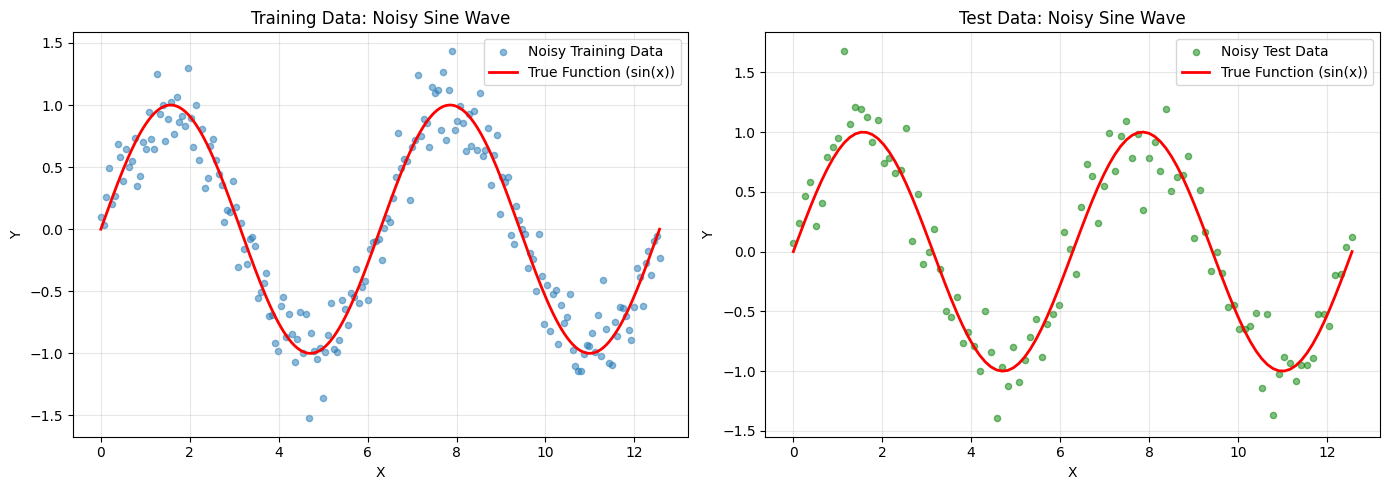

Training samples: 200
Test samples: 100


In [3]:
# Generate synthetic data: noisy sine wave
def generate_data(n_samples=200, noise_level=0.2):
    """
    Generate noisy sine wave data
    
    The true underlying pattern is: y = sin(x)
    We add noise to make the learning task more realistic
    """
    X = np.linspace(0, 4*np.pi, n_samples)
    y_true = np.sin(X)
    y_noisy = y_true + noise_level * np.random.randn(n_samples)
    
    return X, y_true, y_noisy

# Generate training and test data
X_train, y_train_true, y_train = generate_data(n_samples=200, noise_level=0.2)
X_test, y_test_true, y_test = generate_data(n_samples=100, noise_level=0.2)

# Reshape for neural network input
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Visualize the data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.5, s=20, label='Noisy Training Data')
plt.plot(X_train, y_train_true, 'r-', linewidth=2, label='True Function (sin(x))')
plt.title('Training Data: Noisy Sine Wave')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, s=20, label='Noisy Test Data', color='green')
plt.plot(X_test, y_test_true, 'r-', linewidth=2, label='True Function (sin(x))')
plt.title('Test Data: Noisy Sine Wave')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

## Model 1: Underfitting (Too Simple)

This model has **insufficient capacity** to learn the sine wave pattern.
- Only 2 neurons in a single hidden layer
- Cannot capture the complexity of the sine function
- Will perform poorly on both training and test data

In [4]:
# Create an underfitting model (too simple)
underfit_model = Sequential([
    Dense(2, activation='relu', input_dim=1, name='hidden_layer'),
    Dense(1, activation='linear', name='output_layer')
], name='Underfitting_Model')

underfit_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
underfit_model.summary()

# Train the model
history_underfit = underfit_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate
train_loss_underfit = underfit_model.evaluate(X_train, y_train, verbose=0)[0]
test_loss_underfit = underfit_model.evaluate(X_test, y_test, verbose=0)[0]

print(f"\n📊 Underfitting Model Results:")
print(f"Training Loss (MSE): {train_loss_underfit:.4f}")
print(f"Test Loss (MSE): {test_loss_underfit:.4f}")
print(f"\n⚠️ Both losses are HIGH - the model is too simple!")

Model: "Underfitting_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)


📊 Underfitting Model Results:
Training Loss (MSE): 1.1416
Test Loss (MSE): 1.1731

⚠️ Both losses are HIGH - the model is too simple!


## Model 2: Good Fit (Just Right)

This model has **appropriate capacity** to learn the pattern without memorizing noise.
- Moderate number of neurons (20 in each layer)
- Can capture the sine wave pattern
- Generalizes well to new data

In [32]:
# Create a well-fitted model (just right)
goodfit_model = Sequential([
    Dense(64, activation='relu', input_dim=1, name='hidden_layer_1'),
    Dense(64, activation='relu', name='hidden_layer_2'),
    Dense(1, activation='linear', name='output_layer')
], name='GoodFit_Model')

goodfit_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
goodfit_model.summary()

# Train with early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history_goodfit = goodfit_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

# Evaluate
train_loss_goodfit = goodfit_model.evaluate(X_train, y_train, verbose=0)[0]
test_loss_goodfit = goodfit_model.evaluate(X_test, y_test, verbose=0)[0]

print(f"\n📊 Good Fit Model Results:")
print(f"Training Loss (MSE): {train_loss_goodfit:.4f}")
print(f"Test Loss (MSE): {test_loss_goodfit:.4f}")
print(f"\n✅ Training and test losses are similar and LOW!")

Model: "GoodFit_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)


📊 Good Fit Model Results:
Training Loss (MSE): 0.4752
Test Loss (MSE): 0.5248

✅ Training and test losses are similar and LOW!


## Model 3: Overfitting (Too Complex)

This model has **excessive capacity** and memorizes the training data including noise.
- Many neurons (100 in each layer)
- Too many parameters relative to data size
- Performs well on training data but poorly on test data

In [ ]:
# Create an overfitting model (too complex)
overfit_model = Sequential([
    Dense(100, activation='relu', input_dim=1, name='hidden_layer_1'),
    Dense(100, activation='relu', name='hidden_layer_2'),
    Dense(100, activation='relu', name='hidden_layer_3'),
    Dense(1, activation='linear', name='output_layer')
], name='Overfitting_Model')

overfit_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
overfit_model.summary()

# Train without early stopping to allow overfitting
history_overfit = overfit_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,  # Smaller batch size increases overfitting
    validation_split=0.2,
    verbose=0
)

# Evaluate
train_loss_overfit = overfit_model.evaluate(X_train, y_train, verbose=0)[0]
test_loss_overfit = overfit_model.evaluate(X_test, y_test, verbose=0)[0]

print(f"\n📊 Overfitting Model Results:")
print(f"Training Loss (MSE): {train_loss_overfit:.4f}")
print(f"Test Loss (MSE): {test_loss_overfit:.4f}")
print(f"\n⚠️ Training loss is LOW but test loss is HIGH - overfitting!")

Model: "Overfitting_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)


📊 Overfitting Model Results:
Training Loss (MSE): 0.1601
Test Loss (MSE): 0.2085

⚠️ Training loss is LOW but test loss is HIGH - overfitting!


## Visual Comparison: Training History

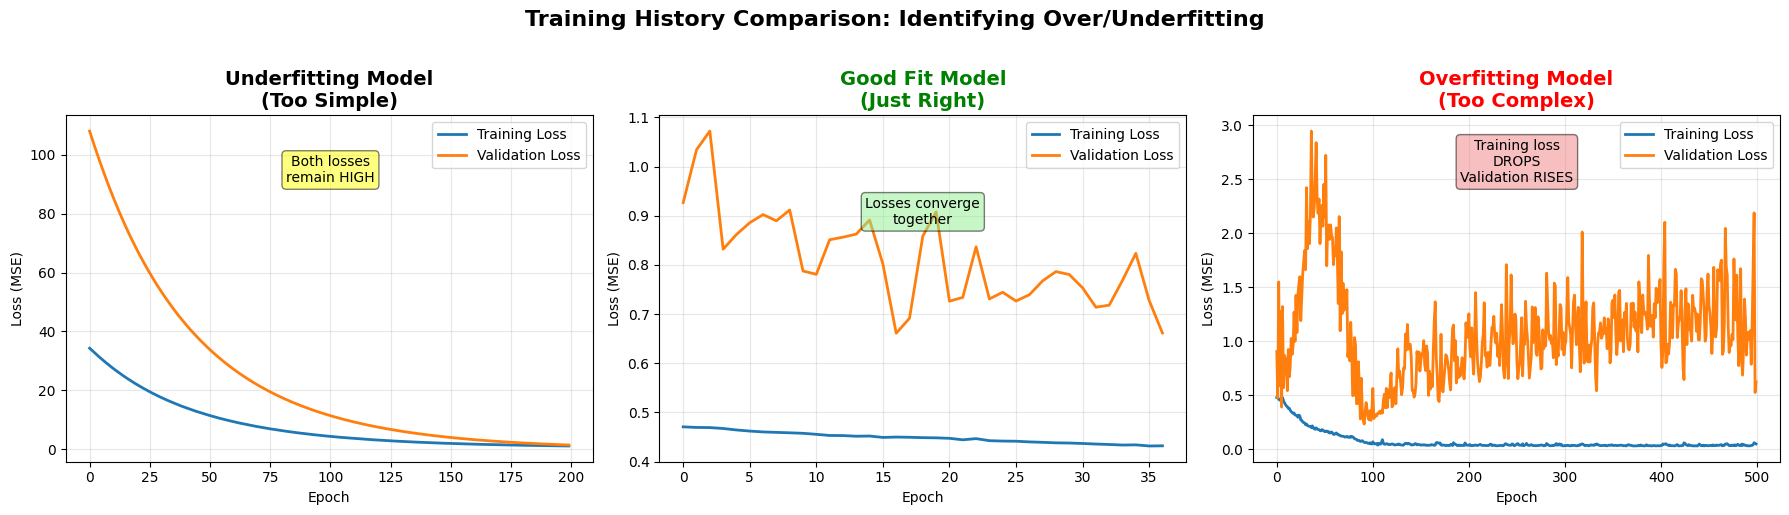

In [7]:
# Plot training history for all models
plt.figure(figsize=(18, 5))

# Underfitting
plt.subplot(1, 3, 1)
plt.plot(history_underfit.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_underfit.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Underfitting Model\n(Too Simple)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(100, plt.ylim()[1]*0.8, 'Both losses\nremain HIGH', 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
         fontsize=10, ha='center')

# Good Fit
plt.subplot(1, 3, 2)
plt.plot(history_goodfit.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_goodfit.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Good Fit Model\n(Just Right)', fontsize=14, fontweight='bold', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(len(history_goodfit.history['loss'])//2, plt.ylim()[1]*0.8, 'Losses converge\ntogether', 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
         fontsize=10, ha='center')

# Overfitting
plt.subplot(1, 3, 3)
plt.plot(history_overfit.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_overfit.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Overfitting Model\n(Too Complex)', fontsize=14, fontweight='bold', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(250, plt.ylim()[1]*0.8, 'Training loss\nDROPS\nValidation RISES', 
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5),
         fontsize=10, ha='center')

plt.suptitle('Training History Comparison: Identifying Over/Underfitting', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Visual Comparison: Predictions

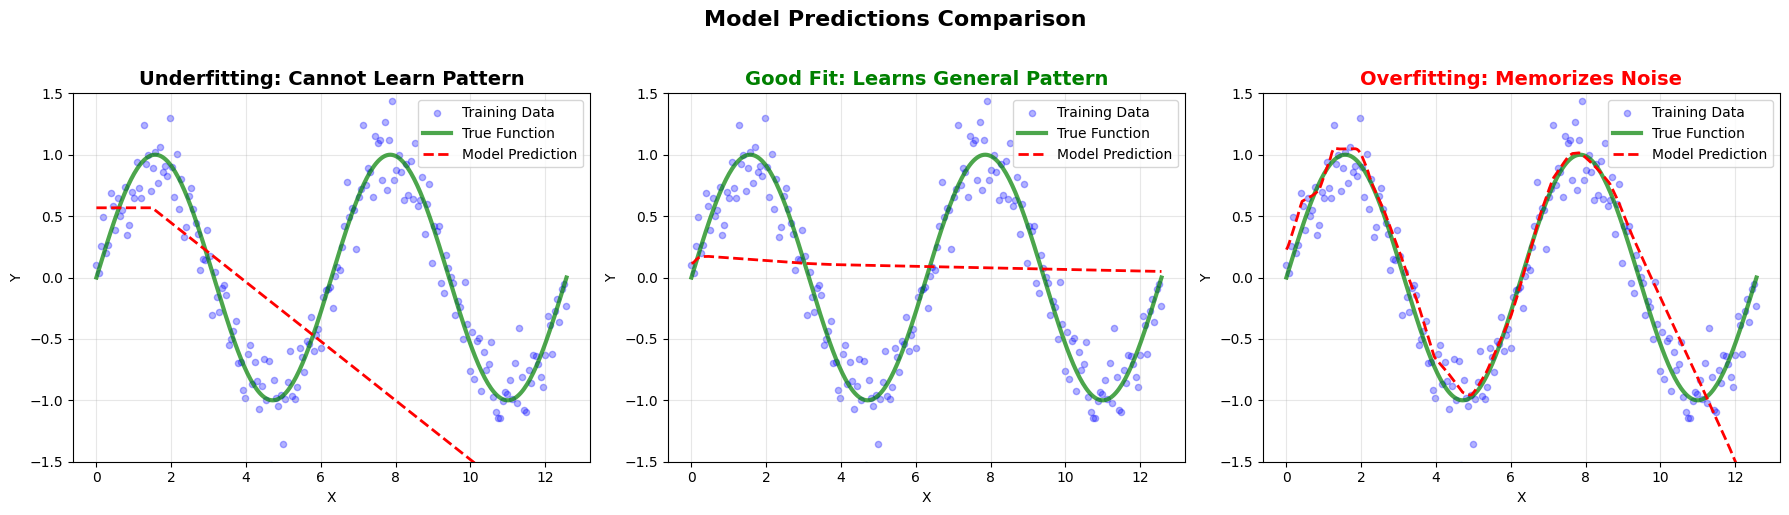

In [8]:
# Generate predictions
X_plot = np.linspace(0, 4*np.pi, 300).reshape(-1, 1)
y_plot_true = np.sin(X_plot.flatten())

y_pred_underfit = underfit_model.predict(X_plot, verbose=0).flatten()
y_pred_goodfit = goodfit_model.predict(X_plot, verbose=0).flatten()
y_pred_overfit = overfit_model.predict(X_plot, verbose=0).flatten()

# Plot predictions
plt.figure(figsize=(18, 5))

# Underfitting
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.3, s=20, color='blue', label='Training Data')
plt.plot(X_plot, y_plot_true, 'g-', linewidth=3, label='True Function', alpha=0.7)
plt.plot(X_plot, y_pred_underfit, 'r--', linewidth=2, label='Model Prediction')
plt.title('Underfitting: Cannot Learn Pattern', fontsize=14, fontweight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)

# Good Fit
plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, alpha=0.3, s=20, color='blue', label='Training Data')
plt.plot(X_plot, y_plot_true, 'g-', linewidth=3, label='True Function', alpha=0.7)
plt.plot(X_plot, y_pred_goodfit, 'r--', linewidth=2, label='Model Prediction')
plt.title('Good Fit: Learns General Pattern', fontsize=14, fontweight='bold', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)

# Overfitting
plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, alpha=0.3, s=20, color='blue', label='Training Data')
plt.plot(X_plot, y_plot_true, 'g-', linewidth=3, label='True Function', alpha=0.7)
plt.plot(X_plot, y_pred_overfit, 'r--', linewidth=2, label='Model Prediction')
plt.title('Overfitting: Memorizes Noise', fontsize=14, fontweight='bold', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)

plt.suptitle('Model Predictions Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Test Set Performance Comparison

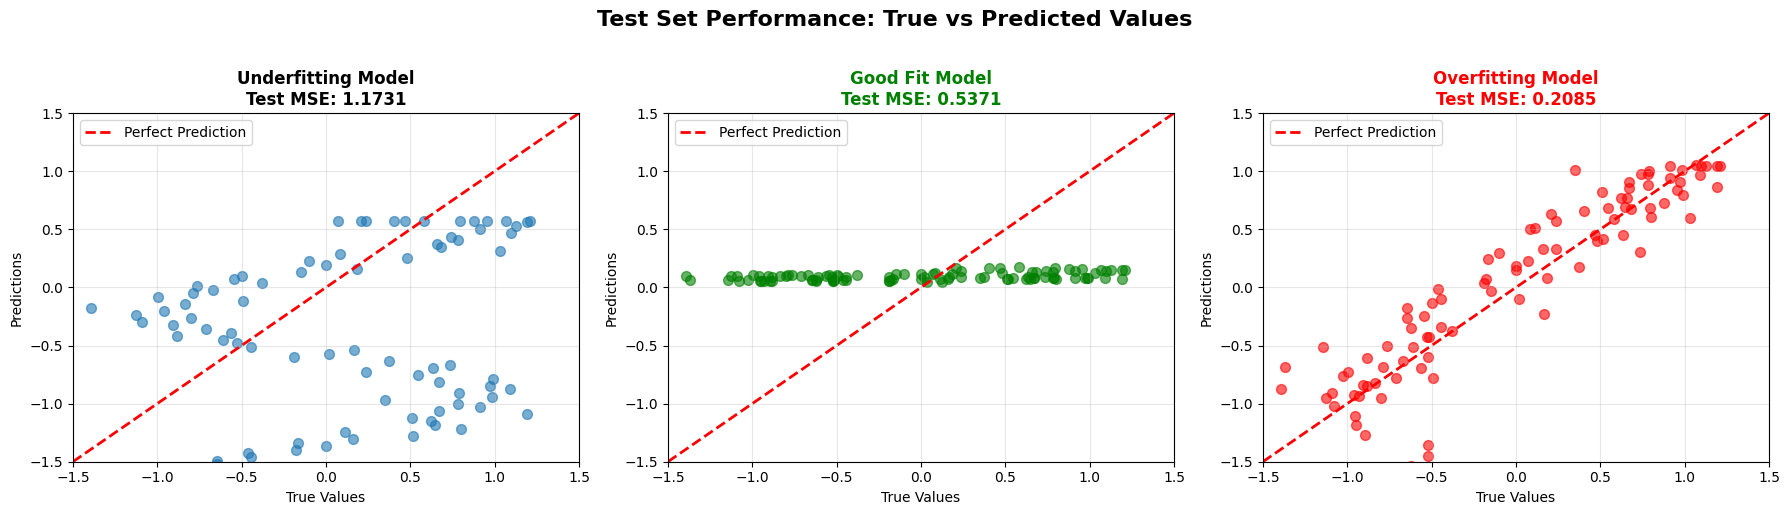

In [9]:
# Compare test set performance
y_test_pred_underfit = underfit_model.predict(X_test, verbose=0).flatten()
y_test_pred_goodfit = goodfit_model.predict(X_test, verbose=0).flatten()
y_test_pred_overfit = overfit_model.predict(X_test, verbose=0).flatten()

plt.figure(figsize=(18, 5))

# Underfitting
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred_underfit, alpha=0.6, s=50)
plt.plot([-1.5, 1.5], [-1.5, 1.5], 'r--', linewidth=2, label='Perfect Prediction')
plt.title(f'Underfitting Model\nTest MSE: {test_loss_underfit:.4f}', fontsize=12, fontweight='bold')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Good Fit
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred_goodfit, alpha=0.6, s=50, color='green')
plt.plot([-1.5, 1.5], [-1.5, 1.5], 'r--', linewidth=2, label='Perfect Prediction')
plt.title(f'Good Fit Model\nTest MSE: {test_loss_goodfit:.4f}', fontsize=12, fontweight='bold', color='green')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Overfitting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred_overfit, alpha=0.6, s=50, color='red')
plt.plot([-1.5, 1.5], [-1.5, 1.5], 'r--', linewidth=2, label='Perfect Prediction')
plt.title(f'Overfitting Model\nTest MSE: {test_loss_overfit:.4f}', fontsize=12, fontweight='bold', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.suptitle('Test Set Performance: True vs Predicted Values', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Summary: How to Identify Over/Underfitting

### 📊 Performance Metrics Summary


MODEL PERFORMANCE SUMMARY
  Model Type  Parameters Training Loss Test Loss Gap (Test - Train)      Diagnosis
Underfitting           7        1.1416    1.1731             0.0315  ⚠️ Too Simple
    Good Fit         481        0.4925    0.5371             0.0446   ✅ Just Right
 Overfitting       20501        0.1601    0.2085             0.0484 ⚠️ Too Complex


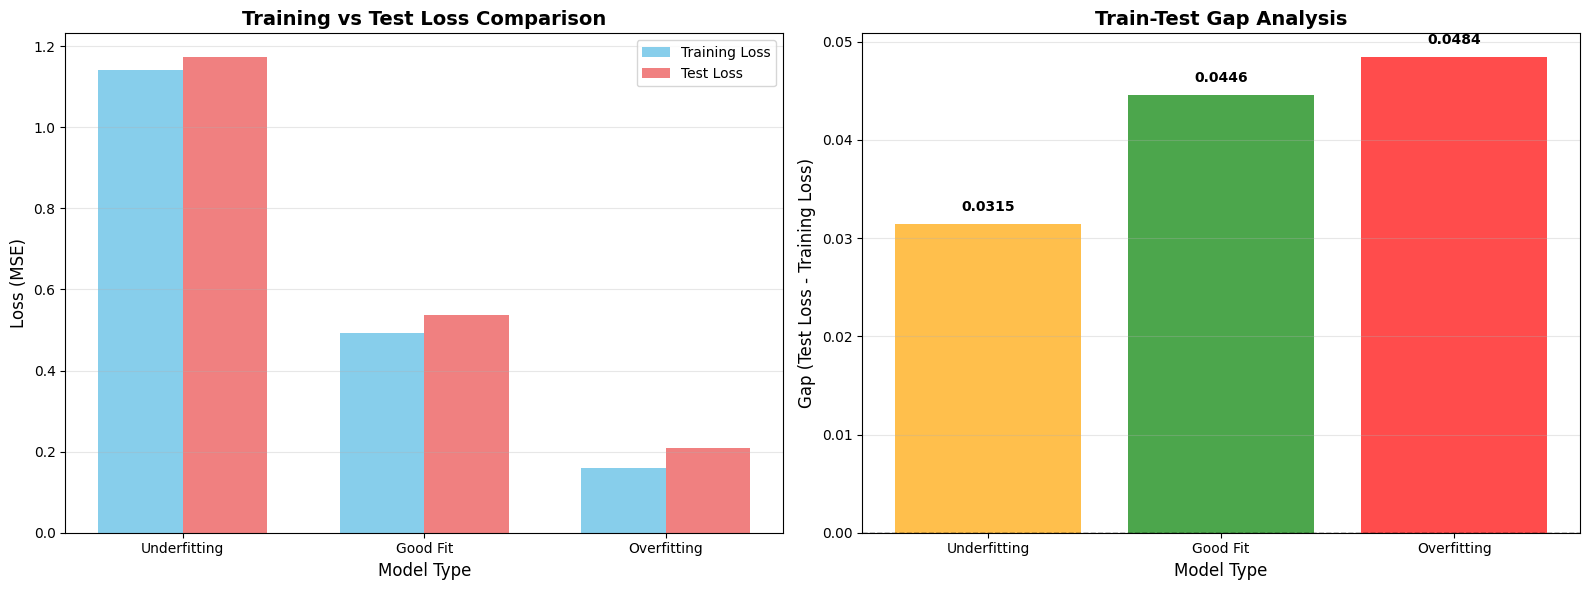

In [10]:
import pandas as pd

# Create summary table
summary_data = {
    'Model Type': ['Underfitting', 'Good Fit', 'Overfitting'],
    'Parameters': [
        underfit_model.count_params(),
        goodfit_model.count_params(),
        overfit_model.count_params()
    ],
    'Training Loss': [
        f"{train_loss_underfit:.4f}",
        f"{train_loss_goodfit:.4f}",
        f"{train_loss_overfit:.4f}"
    ],
    'Test Loss': [
        f"{test_loss_underfit:.4f}",
        f"{test_loss_goodfit:.4f}",
        f"{test_loss_overfit:.4f}"
    ],
    'Gap (Test - Train)': [
        f"{test_loss_underfit - train_loss_underfit:.4f}",
        f"{test_loss_goodfit - train_loss_goodfit:.4f}",
        f"{test_loss_overfit - train_loss_overfit:.4f}"
    ],
    'Diagnosis': [
        '⚠️ Too Simple',
        '✅ Just Right',
        '⚠️ Too Complex'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)

# Visualize the summary
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loss comparison
models = ['Underfitting', 'Good Fit', 'Overfitting']
train_losses = [train_loss_underfit, train_loss_goodfit, train_loss_overfit]
test_losses = [test_loss_underfit, test_loss_goodfit, test_loss_overfit]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_losses, width, label='Training Loss', color='skyblue')
axes[0].bar(x + width/2, test_losses, width, label='Test Loss', color='lightcoral')
axes[0].set_xlabel('Model Type', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training vs Test Loss Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Gap visualization
gaps = [test_losses[i] - train_losses[i] for i in range(3)]
colors = ['orange', 'green', 'red']
axes[1].bar(models, gaps, color=colors, alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Model Type', fontsize=12)
axes[1].set_ylabel('Gap (Test Loss - Training Loss)', fontsize=12)
axes[1].set_title('Train-Test Gap Analysis', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add annotations
for i, gap in enumerate(gaps):
    axes[1].text(i, gap + 0.001, f'{gap:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎓 Key Takeaways

### How to Identify Each Condition:

#### 🔴 **Underfitting** (Model is too simple)
- **Training loss**: HIGH
- **Test loss**: HIGH
- **Gap**: Small (both are bad)
- **Training curves**: Both losses plateau at high values
- **Solution**: 
  - Increase model complexity (more layers/neurons)
  - Train longer
  - Add more relevant features
  - Use more complex activation functions

#### 🟢 **Good Fit** (Just right!)
- **Training loss**: LOW
- **Test loss**: LOW (similar to training)
- **Gap**: Small (both are good)
- **Training curves**: Both losses decrease and converge together
- **This is what we want!**

#### 🔴 **Overfitting** (Model memorizes training data)
- **Training loss**: VERY LOW
- **Test loss**: HIGH
- **Gap**: Large (training much better than test)
- **Training curves**: Training loss keeps decreasing, validation loss increases
- **Solution**:
  - Reduce model complexity
  - Add regularization (L1, L2, Dropout)
  - Get more training data
  - Use early stopping
  - Data augmentation

### 📈 The Bias-Variance Tradeoff

- **Underfitting** = High bias (model is too simple)
- **Overfitting** = High variance (model is too complex)
- **Goal** = Find the sweet spot with balanced bias and variance

### 🛠️ Practical Tips:

1. **Always split your data**: Training, validation, and test sets
2. **Monitor both losses**: If they diverge significantly, you're overfitting
3. **Use early stopping**: Stop training when validation loss stops improving
4. **Start simple**: Begin with a simple model and increase complexity gradually
5. **Cross-validation**: Use k-fold cross-validation for more robust evaluation

---

**Remember**: The best model is not the one that performs best on training data, but the one that generalizes well to unseen data!

## 🔬 Bonus: Preventing Overfitting with Dropout

Let's see how **Dropout** (a regularization technique) can help prevent overfitting:

In [ ]:
# Create a model with Dropout to prevent overfitting
dropout_model = Sequential([
    Dense(100, activation='relu', input_dim=1, name='hidden_layer_1'),
    Dropout(0.3),  # Randomly drop 30% of neurons during training
    Dense(100, activation='relu', name='hidden_layer_2'),
    Dropout(0.3),
    Dense(100, activation='relu', name='hidden_layer_3'),
    Dropout(0.3),
    Dense(1, activation='linear', name='output_layer')
], name='Dropout_Model')

dropout_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history_dropout = dropout_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

train_loss_dropout = dropout_model.evaluate(X_train, y_train, verbose=0)[0]
test_loss_dropout = dropout_model.evaluate(X_test, y_test, verbose=0)[0]

# Compare with and without Dropout
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_overfit.history['loss'], label='Training (No Dropout)', linewidth=2)
plt.plot(history_overfit.history['val_loss'], label='Validation (No Dropout)', linewidth=2)
plt.plot(history_dropout.history['loss'], label='Training (With Dropout)', linewidth=2, linestyle='--')
plt.plot(history_dropout.history['val_loss'], label='Validation (With Dropout)', linewidth=2, linestyle='--')
plt.title('Effect of Dropout on Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
models_comp = ['Without Dropout', 'With Dropout']
train_comp = [train_loss_overfit, train_loss_dropout]
test_comp = [test_loss_overfit, test_loss_dropout]

x = np.arange(len(models_comp))
plt.bar(x - 0.2, train_comp, 0.4, label='Training Loss', color='skyblue')
plt.bar(x + 0.2, test_comp, 0.4, label='Test Loss', color='lightcoral')
plt.xlabel('Model Type')
plt.ylabel('Loss (MSE)')
plt.title('Dropout Reduces Overfitting', fontsize=14, fontweight='bold')
plt.xticks(x, models_comp)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 Dropout Model Results:")
print(f"Training Loss: {train_loss_dropout:.4f}")
print(f"Test Loss: {test_loss_dropout:.4f}")
print(f"Gap: {test_loss_dropout - train_loss_dropout:.4f}")
print(f"\n✅ Dropout helped reduce the gap from {test_loss_overfit - train_loss_overfit:.4f} to {test_loss_dropout - train_loss_dropout:.4f}!")